













































































































# Data Acquisition

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Jobs_NYC_Postings.csv')
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,689000,OFFICE OF THE COMPTROLLER,External,1,Legal Intern - Law and Adjustment,SUMMER GRADUATE INTERN,Non-Competitive-5,10232,00,Legal Affairs,...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,11/19/2024,01-MAR-2025,11/19/2024,01/14/2025
1,638984,DEPARTMENT OF TRANSPORTATION,External,1,Clerical Associate,CLERICAL ASSOCIATE,Competitive-1,10251,04,"Administration & Human Resources Policy, Resea...",...,***CANDIDATES MUST BE SERVING PERMANENTLY IN T...,***CANDIDATES MUST BE SERVING PERMANENTLY IN T...,35 Hours/Week,NaN,NaN,New York City residency is generally required ...,06/26/2024,NaN,01/10/2025,01/14/2025
2,632969,DEPARTMENT OF TRANSPORTATION,Internal,3,Assistant General Counsel,AGENCY ATTORNEY,Non-Competitive-5,30087,01,Legal Affairs,...,NaN,All resumes are to be submitted electronically...,35hrs,"55 Water Street, NY, NY",NaN,New York City Residency is not required for th...,04/11/2024,NaN,04/11/2024,01/14/2025
3,590075,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,Administration & Human Resources,...,NaN,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,06/26/2023,NaN,07/17/2023,01/14/2025
4,697191,HOUSING PRESERVATION & DVLPMNT,Internal,1,Deputy Press Secretary for the Division of Com...,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Communications & Intergovernmental Affairs,...,This position is also open to qualified person...,Apply online,NaN,100 Gold Street,NaN,New York City residency is generally required ...,01/09/2025,08-FEB-2025,01/09/2025,01/14/2025


In [81]:
print(df["Salary Range From"].dtype)
print(df["Salary Range To"].dtype)

float64
float64


In [82]:
print("Missing values under 'Post Until'")
print(df["Post Until"].isna().sum())
print("Missing values under 'Recruitment Contact'")
print(df["Recruitment Contact"].isna().sum())
print("Missing values under 'Work Location 1'")
print(df["Work Location 1"].isna().sum())
print("Missing values under 'Hours/Shift'")
print(df["Hours/Shift"].isna().sum())
print("Missing values under 'Preferred Skills'")
print(df["Preferred Skills"].isna().sum())

Missing values under 'Post Until'
3983
Missing values under 'Recruitment Contact'
5790
Missing values under 'Work Location 1'
4056
Missing values under 'Hours/Shift'
4384
Missing values under 'Preferred Skills'
2186


In [83]:
import os
print("File size: " + str(os.path.getsize('/content/drive/MyDrive/Colab Notebooks/Jobs_NYC_Postings.csv') / 1000000) + " MB")

File size: 37.264538 MB


In [84]:
#number of columns that contain each data type
df.dtypes.value_counts()

,count
object,25
float64,3
int64,2


# Data Inspection
This 37 MB dataset of NYC jobs has 5790 rows of data and 30 columns. Most of the columns are nominal data but there are also columns for quantitative data and date data. 25 of the columns contain objects. 3 of them contain float data. 2 of them contain integers. Most of these listings have only 1 position available. Most of the columns that have nominal data are organizational (agency, role business title, job category, career level). The amount of internal and external listing types are almost completely evenly split. There's ordinal data in the Level column. The salary columns are using floats for the figures.

Most of the columns were self-explanatory. The Job ID column was clearly the primary key for each listing. There are 2 columns for the titles of each listing: Business Title and Civil Service Title. The Title Classification column separates listings as Competitive or Non-Competitive. Competitive means that there's a civil service exam that must be taken and passed in order for a candidate to be qualified for a position. Non-Competitive means there isn't one. The rest of the columns contain information that would be commonly shown in the job descriptions for most job seekers to apply.

As large as this dataset seems, there are some columns that have a considerable amount of missing data. 3983 of the listings have blank values under the "Post Until" column. 5790 of the listings have blank values under the "Recruitment Contact" column. 4056 of the listings have blank values under the "Work Location 1" column. 4384 of the listings have blank values under the "Hours/Shift" column. 2186 of the listings have blank values under the "Preferred Skills" column.

# Data Cleaning and Preparation

We started out with removing the following columns we did not need for our analysis: "To Apply", "Post Until", "Title Code No", "Recruitment Contact", "Posting Updated", "Process Date", "Work Location 1", "Residency Requirement" These columns either had too many missing values or they did not contain any insightful data.



*   thinking of getting rid of the job descriptions, preferred skills, additional information, hours/shift, work location 1, Residency Requirement, Job ID. lmk if you guys think we should keep them
* what columns should be try to normalize or convert?
* what categorical variables should be convert?



In [85]:
df = df.drop(columns=["To Apply",
                      "Job ID",
                      "# Of Positions",
                      "Post Until",
                      "Title Code No",
                      "Recruitment Contact",
                      "Posting Updated",
                      "Process Date",
                      "Work Location 1",
                      "Residency Requirement",
                      "Hours/Shift"])

After that, we simplified the Job Category column into the following categories because there were 186 unique categories: Admin & HR, Building Ops, Comms & IG Affairs, Community Programs, Eng Arch Planning, Finance, Green Jobs, Health, Legal Affairs, Policy, Public Safety, Social Services, Tech

In [86]:
df["Job Category"].value_counts()

,count
Job Category,
"Engineering, Architecture, & Planning",1004
Health,444
"Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement",358
"Finance, Accounting, & Procurement",307
Legal Affairs,295
...,...
"Constituent Services & Community Programs Health Technology, Data & Innovation Policy, Research & Analysis",2
"Administration & Human Resources Constituent Services & Community Programs Communications & Intergovernmental Affairs Technology, Data & Innovation Social Services",2
"Administration & Human Resources Communications & Intergovernmental Affairs Engineering, Architecture, & Planning Health Policy, Research & Analysis Public Safety, Inspections, & Enforcement",1


In [87]:
df["Job_Category_clean"] = ""

In [88]:
# for each instance in the column "Job Category",
# set "Job_Category_clean" to "Admin & HR" if Job Category contains "Administration & Human Resources"
df.loc[df["Job Category"].str.contains("Administration & Human Resources"), "Job_Category_clean"] = "Admin & HR"

# set "Job_Category_clean" to "Building Ops" if Job Category contains "Building Operations & Maintenance"
df.loc[df["Job Category"].str.contains("Building Operations & Maintenance"), "Job_Category_clean"] = "Building Ops"

# set "Job_Category_clean" to "Comms & IG Affairs" if Job Category contains "Communications & Intergovernmental Affairs"
df.loc[df["Job Category"].str.contains("Communications & Intergovernmental Affairs"), "Job_Category_clean"] = "Comms & IG Affairs"

# set "Job_Category_clean" to "Community Programs" if Job Category contains "Constituent Services & Community Programs"
df.loc[df["Job Category"].str.contains("Constituent Services & Community Programs"), "Job_Category_clean"] = "Community Programs"

# set "Job_Category_clean" to "Eng, Arch, Planning" if Job Category contains "Engineering, Architecture, & Planning"
df.loc[df["Job Category"].str.contains("Engineering, Architecture, & Planning"), "Job_Category_clean"] = "Eng, Arch, Planning"

# set "Job_Category_clean" to "Finance" if Job Category starts with "Finance, Accounting"
df.loc[df["Job Category"].str.startswith("Finance, Accounting"), "Job_Category_clean"] = "Finance"

# set "Job_Category_clean" to "Green Jobs" if Job Category contains "Green Jobs"
df.loc[df["Job Category"].str.contains("Green Jobs"), "Job_Category_clean"] = "Green Jobs"

# set "Job_Category_clean" to "Health" if "Health" is the first 6 letters of Job Category
df.loc[df["Job Category"].str.startswith("Health"), "Job_Category_clean"] = "Health"

# set "Job_Category_clean" to "Legal Affairs" if Job Category starts with "Legal Affairs" or contains "Mental Health Health Legal Affairs"
df.loc[(df["Job Category"].str.startswith("Legal Affairs")) | (df["Job Category"].str.contains("Mental Health Health Legal Affairs")), "Job_Category_clean"] = "Legal Affairs"

# set "Job_Category_clean" to "Policy" if Job Category starts with "Policy"
df.loc[df["Job Category"].str.startswith("Policy"), "Job_Category_clean"] = "Policy"

# set "Job_Category_clean" to "Public Safety" if Job Category starts with "Public Safety"
df.loc[df["Job Category"].str.startswith("Public Safety"), "Job_Category_clean"] = "Public Safety"

# set "Job_Category_clean" to "Social Services" if Job Category starts with "Social Services"
df.loc[df["Job Category"].str.startswith("Social Services"), "Job_Category_clean"] = "Social Services"

# set "Job_Category_clean" to "Tech" if Job Category starts with "Technology, Data"
df.loc[df["Job Category"].str.startswith("Technology, Data"), "Job_Category_clean"] = "Tech"

In [89]:
df["Posting Year"] = pd.to_datetime(df["Posting Date"]).dt.year

In [90]:
df['Agency'] = df['Agency'].str.title()

# EDA with Focus on Static Visualization

<ipython-input-91-dfe98ba0e3ae>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, df["Career Level"].value_counts()[i], df["Career Level"].value_counts()[i])
<ipython-input-91-dfe98ba0e3ae>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, df["Career Level"].value_counts()[i], df["Career Level"].value_counts()[i])
<ipython-input-91-dfe98ba0e3ae>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, df

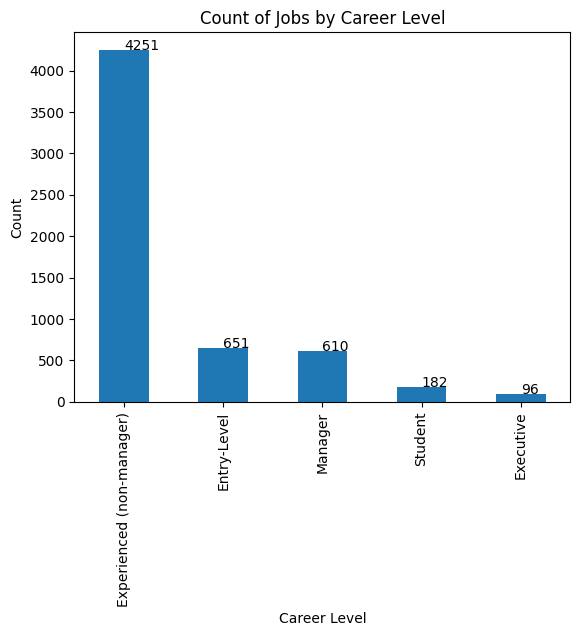

Text(0.5, 1.0, 'Percentage of Jobs by Career Level')

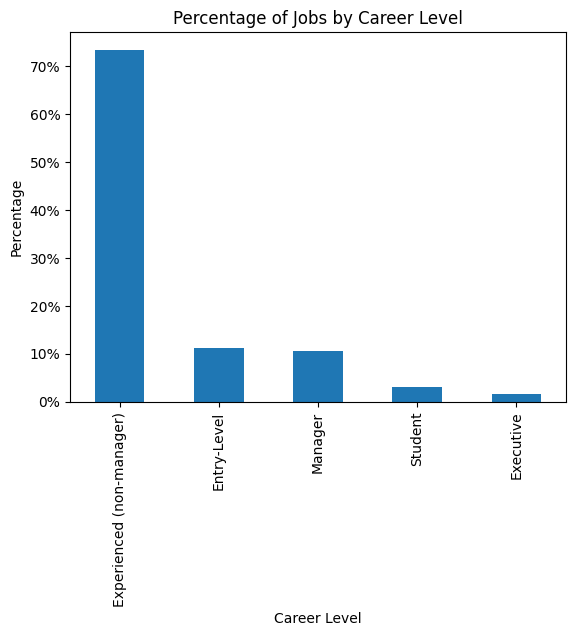

In [91]:
import matplotlib.pyplot as plt
df["Career Level"].value_counts().plot(kind="bar")
plt.xlabel("Career Level")
plt.ylabel("Count")
plt.title("Count of Jobs by Career Level")
for i in range(len(df["Career Level"].value_counts())):
    plt.text(i, df["Career Level"].value_counts()[i], df["Career Level"].value_counts()[i])
plt.show()
df["Career Level"].value_counts(normalize=True).plot(kind="bar")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))
plt.xlabel("Career Level")
plt.ylabel("Percentage")
plt.title("Percentage of Jobs by Career Level")

Text(2024, 4027, '4027')

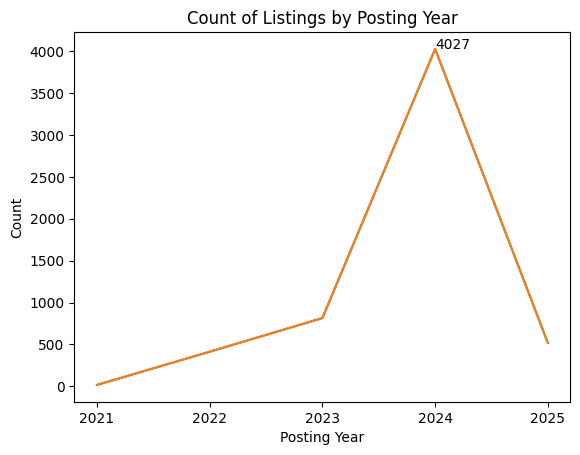

In [93]:
df["Posting Year"].value_counts().sort_index().plot(kind="line")
plt.xlabel("Posting Year")
plt.ylabel("Count")
plt.title("Count of Listings by Posting Year")

df["Posting Year"].value_counts().sort_index().plot(kind="line")
plt.xlabel("Posting Year")
plt.ylabel("Count")
plt.title("Count of Listings by Posting Year")
plt.xticks(range(2021, 2026))
plt.annotate(str(df["Posting Year"].value_counts().max()), xy=(df["Posting Year"].value_counts().idxmax(), df["Posting Year"].value_counts().max()), xytext=(df["Posting Year"].value_counts().idxmax(), df["Posting Year"].value_counts().max()))

([<matplotlib.axis.XTick at 0x7a1853122710>,
 [Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024'),
  Text(2025, 0, '2025')])

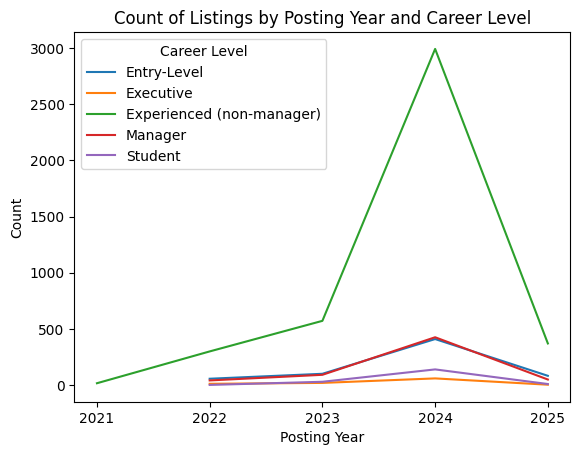

In [94]:
df.groupby(["Posting Year", "Career Level"]).size().unstack().plot(kind="line")
plt.xlabel("Posting Year")
plt.ylabel("Count")
plt.title("Count of Listings by Posting Year and Career Level")
plt.xticks(range(2021, 2026))

Text(0, 0.5, 'Percentage')

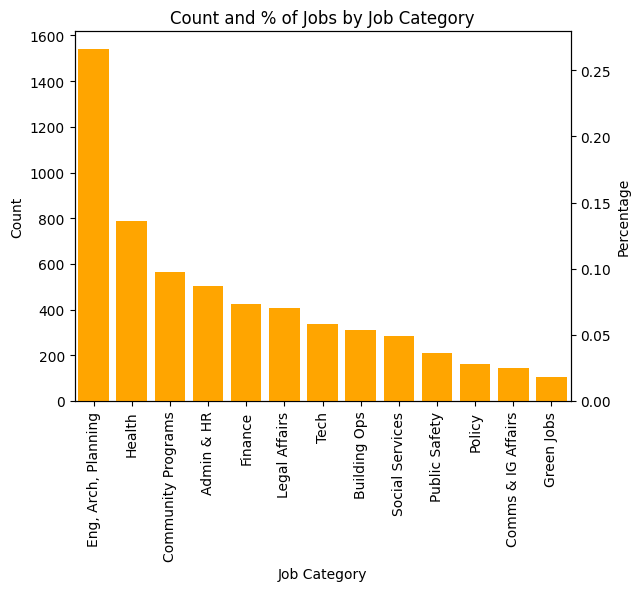

In [96]:
df["Job_Category_clean"].value_counts().plot(kind="bar")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.title("Count and % of Jobs by Job Category")
plt.twinx().bar(df["Job_Category_clean"].value_counts().index, df["Job_Category_clean"].value_counts(normalize=True), color="orange")
plt.ylabel("Percentage")

Text(0.5, 1.0, 'Count of External Jobs by Job Category')

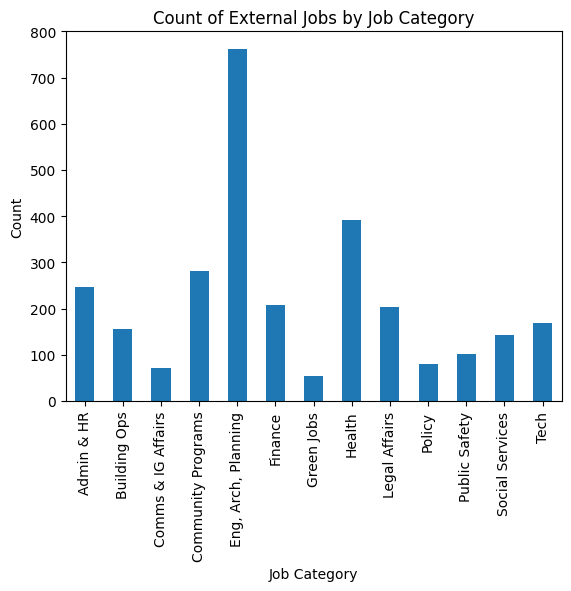

In [97]:
df[df["Posting Type"] != "Internal"].groupby("Job_Category_clean").size().plot(kind="bar")

plt.xlabel("Job Category")
plt.ylabel("Count")
plt.title("Count of External Jobs by Job Category")

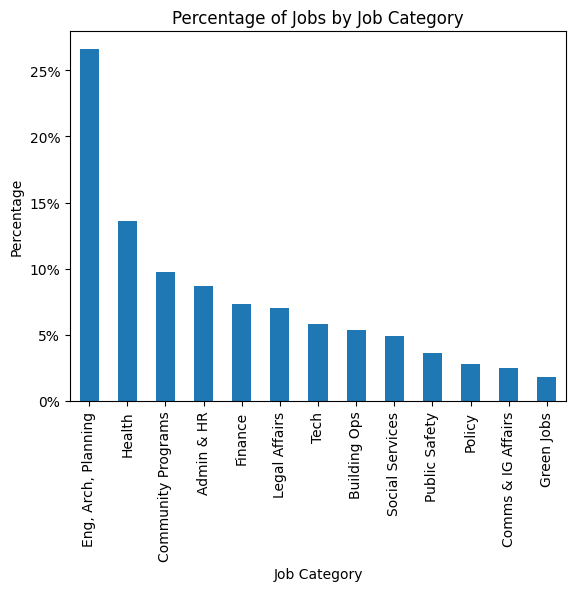

In [98]:
df["Job_Category_clean"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Job Category")
plt.ylabel("Percentage")
plt.title("Percentage of Jobs by Job Category")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))

Text(0.5, 1.0, 'Count of Student Jobs by Job Category')

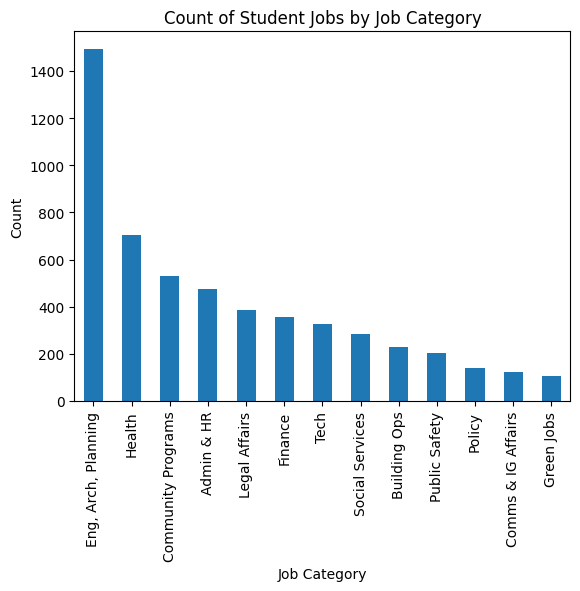

In [105]:
df[(df["Posting Type"] != "Internal") & (df["Posting Type"] == "Student")]
df["Job_Category_clean"].value_counts().plot(kind="bar")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.title("Count of Student Jobs by Job Category")

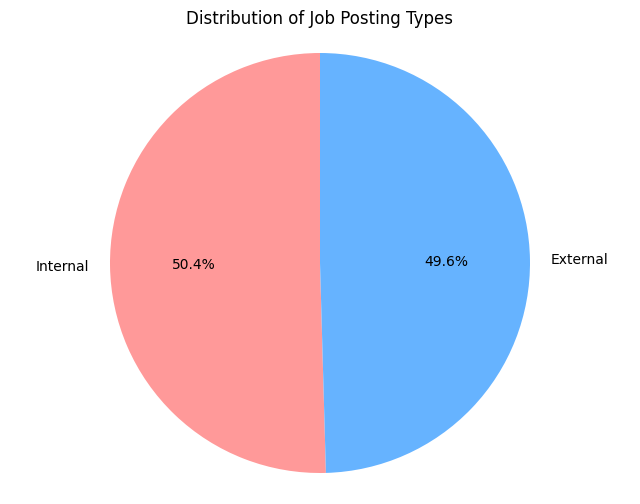

In [99]:
posting_counts = df['Posting Type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(posting_counts, labels=posting_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Distribution of Job Posting Types')
plt.axis('equal')
plt.show()

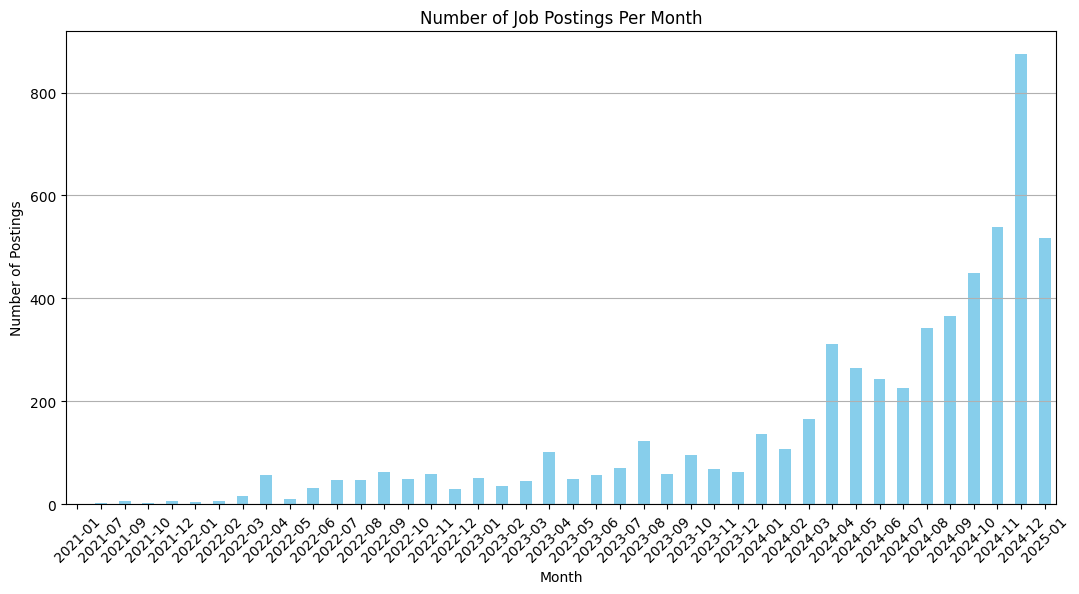

In [100]:
df['Posting Date'] = pd.to_datetime(df['Posting Date'], errors='coerce')
df = df.dropna(subset=['Posting Date'])

if pd.api.types.is_datetime64_any_dtype(df['Posting Date']):
    df['Month'] = df['Posting Date'].dt.to_period('M')
    monthly_postings = df.groupby('Month').size()


    plt.figure(figsize=(12, 6))
    monthly_postings.plot(kind='bar', color='skyblue')
    plt.title('Number of Job Postings Per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Postings')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
    plt.show()

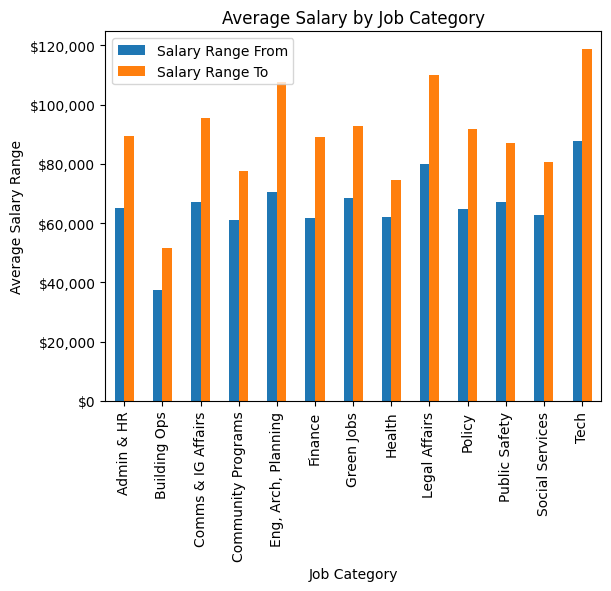

In [101]:
# min vs max trend in avg salaries wrt job categories
import matplotlib.pyplot as plt
df.groupby("Job_Category_clean")[["Salary Range From", "Salary Range To"]].mean().plot(kind="bar")

df = df[df["Salary Frequency"] != "Hourly"]
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.xlabel("Job Category")
plt.ylabel("Average Salary Range")
plt.title("Average Salary by Job Category")
plt.show()

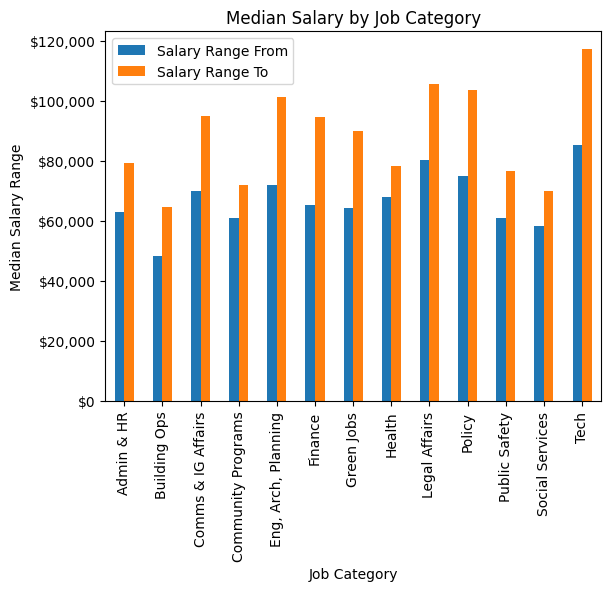

In [102]:
# bar chart to observe the trend for max vs min median salary by job category
df.groupby("Job_Category_clean")[["Salary Range From", "Salary Range To"]].median().plot(kind="bar")

df = df[df["Salary Frequency"] != "Hourly"]
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.xlabel("Job Category")
plt.ylabel("Median Salary Range")
plt.title("Median Salary by Job Category")
plt.show()

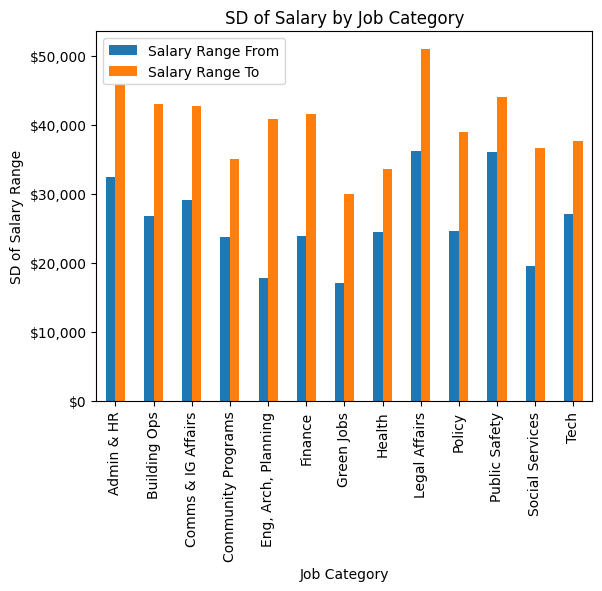

In [103]:
# bar chart to observe the trend for max vs min sd salary by job category
df.groupby("Job_Category_clean")[["Salary Range From", "Salary Range To"]].std().plot(kind="bar")

df = df[df["Salary Frequency"] != "Hourly"]
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.xlabel("Job Category")
plt.ylabel("SD of Salary Range")
plt.title("SD of Salary by Job Category")
plt.show()

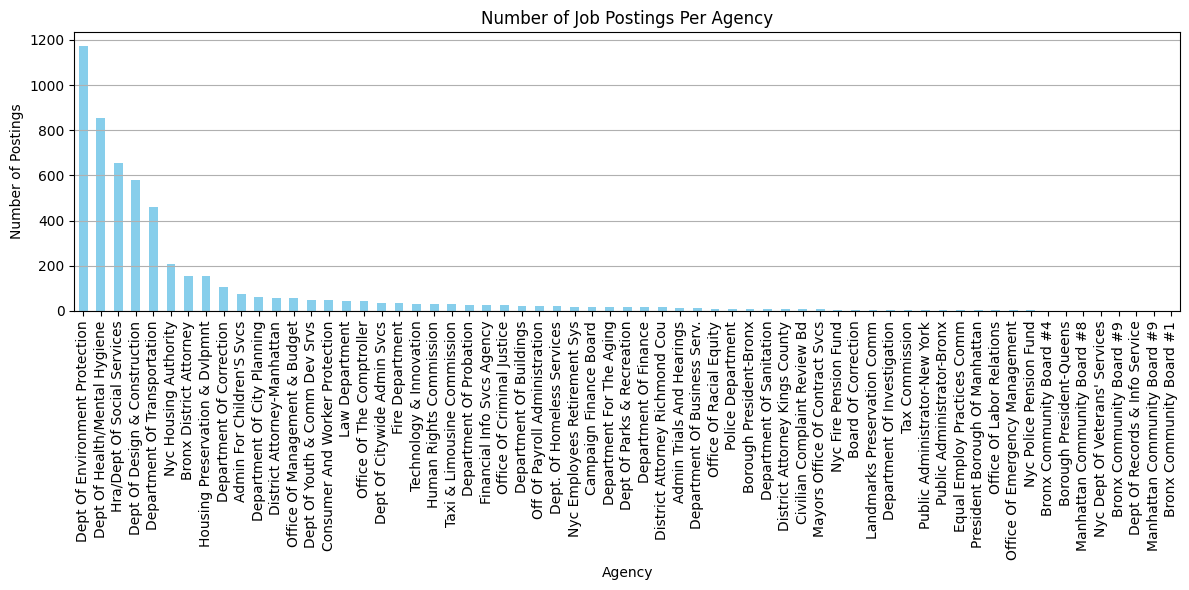

In [104]:
agency_counts = df['Agency'].value_counts()
plt.figure(figsize=(12, 6))
agency_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Job Postings Per Agency')
plt.xlabel('Agency')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()